In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import sklearn
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_validate


1.First of all, we recommend to check whether if the dataset includes missing parts. Then split the dataset into train set (80% of the data) and test set (20% of the data).
Note: Do NOT use the test set unless for loss computation.
in this part the dataSet is imported

In [ ]:


boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


if we take a look at the boston descriptions, we can observe that MEDV variable is not present in the data frame (Median value of owner-occupied homes in $1000s), therefore a new column containing this value should be added to the data set

In [ ]:
boston_df['MEDV'] = boston.target

In [ ]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


As we can see the missing column value is now added to the data frame, in the next part the data is going to be split up into training and testing sets

In [ ]:
X = boston_df.drop('MEDV', axis = 1)
Y = boston_df['MEDV']

in the next part we are going to find the correlation between features and the related plots are shown in the following.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


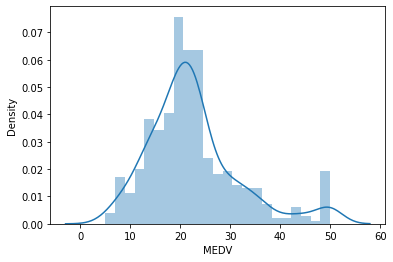

In [ ]:
sn.distplot(boston_df['MEDV'])

as we can see the values of MEDV , they are almost distributed as a normal distribution

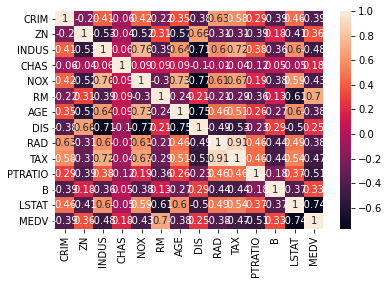

In [ ]:
corr_matrix = boston_df.corr().round(2)
sn.heatmap(data = corr_matrix, annot=True)


the heatmap matrix is shown above, the correlation ranges from -1 to 1, as we get closer to 1 , it means that there is a strong positive correlation between the two factors. and likewise for the negative ones.

همان‌طور که در شکل بالا دیده می شود، برای اینکه به بیشترین کورلیشن ها برسیم، باید مقادیری که با متغیر اصلی ما یعنی قیمت مقادیر نزدیک به یک دارند را بررسی کنیم. 

in this correlation matrix, in the last row, it is obvious that RM has a strong correlation with MDEV with the value of 0.7, where LSTAT has the least correlation value of -0.74.
thus, in order to select features, we should not choose the pairs which have a high correlation value, for instance TAX and RAD have a correlation of 0.91 , so choosing them both would not help us train the model.


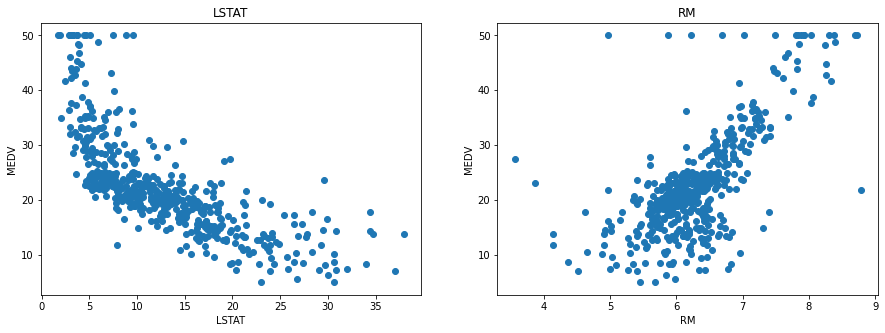

In [ ]:
plt.figure(figsize=(15, 5))

features = ['LSTAT', 'RM', ]
target = boston_df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston_df[col]
    y = target

    
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

the two most important plots are shown above, and the rest of them are in the following, as we can see the MEDV price has an almost linear relation with RM , as the RM rises, MEDV grows as well. but the LSTAT has an opposite relation , and as the LSTAT grows , MEDV prices decrease.

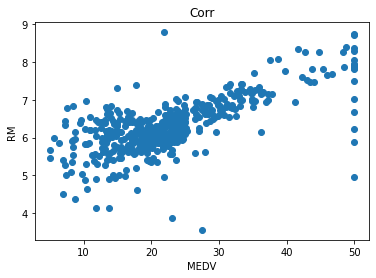

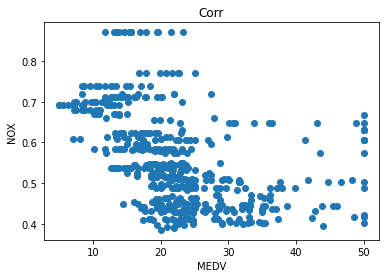

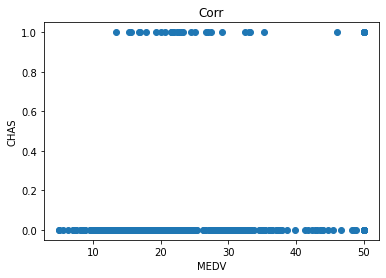

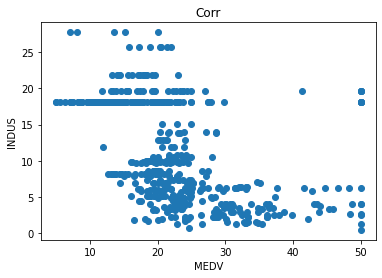

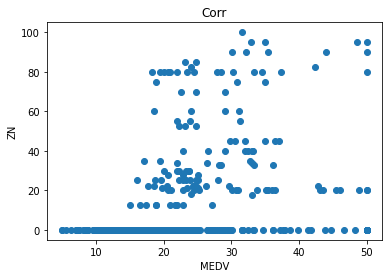

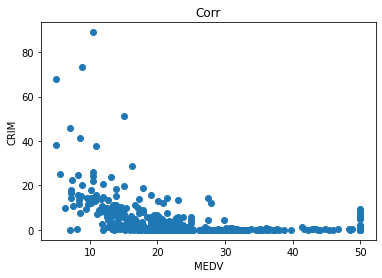

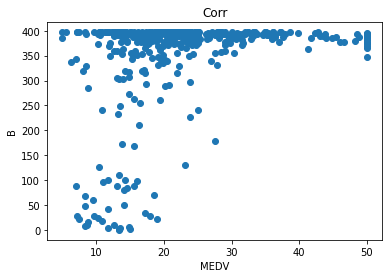

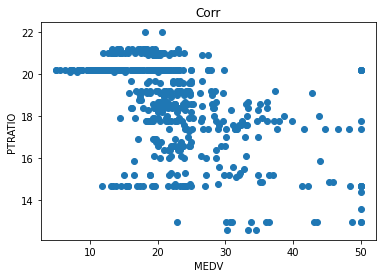

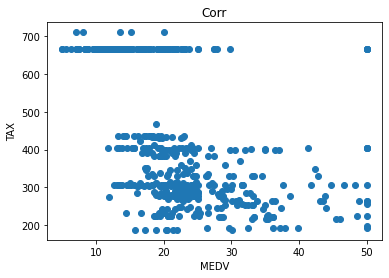

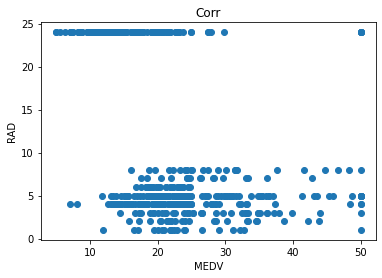

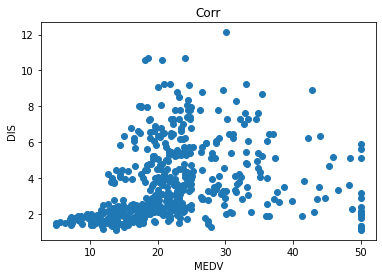

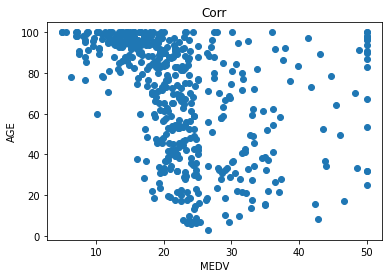

In [ ]:

plt.scatter(boston_df['MEDV'], boston_df['RM'])
plt.gca().set(title='Corr')
plt.xlabel('MEDV')
plt.ylabel('RM')
plt.show()

plt.scatter(boston_df['MEDV'], boston_df['NOX'])
plt.gca().set(title='Corr')
plt.xlabel('MEDV')
plt.ylabel('NOX')
plt.show()

plt.scatter(boston_df['MEDV'], boston_df['CHAS'])
plt.gca().set(title='Corr')
plt.xlabel('MEDV')
plt.ylabel('CHAS')
plt.show()

plt.scatter(boston_df['MEDV'], boston_df['INDUS'])
plt.gca().set(title='Corr')
plt.xlabel('MEDV')
plt.ylabel('INDUS')
plt.show()

plt.scatter(boston_df['MEDV'], boston_df['ZN'])
plt.gca().set(title='Corr')
plt.xlabel('MEDV')
plt.ylabel('ZN')
plt.show()

plt.scatter(boston_df['MEDV'], boston_df['CRIM'])
plt.gca().set(title='Corr')
plt.xlabel('MEDV')
plt.ylabel('CRIM')
plt.show()

plt.scatter(boston_df['MEDV'], boston_df['B'])
plt.gca().set(title='Corr')
plt.xlabel('MEDV')
plt.ylabel('B')
plt.show()

plt.scatter(boston_df['MEDV'], boston_df['PTRATIO'])
plt.gca().set(title='Corr')
plt.xlabel('MEDV')
plt.ylabel('PTRATIO')
plt.show()

plt.scatter(boston_df['MEDV'], boston_df['TAX'])
plt.gca().set(title='Corr')
plt.xlabel('MEDV')
plt.ylabel('TAX')
plt.show()

plt.scatter(boston_df['MEDV'], boston_df['RAD'])
plt.gca().set(title='Corr')
plt.xlabel('MEDV')
plt.ylabel('RAD')
plt.show()

plt.scatter(boston_df['MEDV'], boston_df['DIS'])
plt.gca().set(title='Corr')
plt.xlabel('MEDV')
plt.ylabel('DIS')
plt.show()

plt.scatter(boston_df['MEDV'], boston_df['AGE'])
plt.gca().set(title='Corr')
plt.xlabel('MEDV')
plt.ylabel('AGE')
plt.show()


In [ ]:
train = boston_df.sample(frac=0.8, random_state=int(time.time()))
test = boston_df.drop(train.index)
print(train.shape, test.shape)

(405, 14) (101, 14)


after selcting the trianing and test section of the data set , using the closed form of the linear regression  parameters, we are going to find the optimal weight parameters.

          CRIM     ZN  INDUS   CHAS    NOX  ...    TAX  PTRATIO      B  LSTAT   MEDV
CRIM      True  False  False  False  False  ...  False    False  False  False  False
ZN       False   True  False  False  False  ...  False    False  False  False  False
INDUS    False  False   True  False  False  ...  False    False  False  False  False
CHAS     False  False  False   True  False  ...  False    False  False  False  False
NOX      False  False  False  False   True  ...  False    False  False  False  False
RM       False  False  False  False  False  ...  False    False  False  False  False
AGE      False  False  False  False  False  ...  False    False  False  False  False
DIS      False  False  False  False  False  ...  False    False  False  False  False
RAD      False  False  False  False  False  ...   True    False  False  False  False
TAX      False  False  False  False  False  ...   True    False  False  False  False
PTRATIO  False  False  False  False  False  ...  False     True  

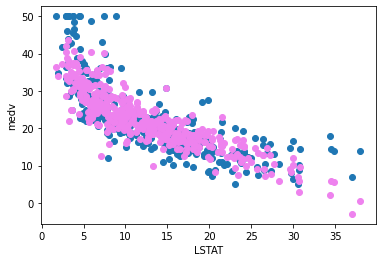

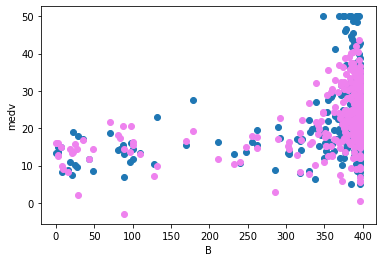

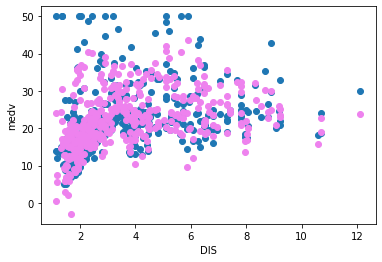

In [ ]:
def weight(x, y):
    t1 = np.dot(np.transpose(x), x)
    t2 = np.dot(np.transpose(x), y)
    return np.dot(np.linalg.pinv(t1), t2)

def predict(x, weight):
    return np.dot(x, weight)



df = train
df = df.round(3)
print(df.corr() > 0.9)
df.drop(['RAD'], axis=1, inplace=True)

medv = df['MEDV'].to_numpy()
x = df.loc[:, 'CRIM':'LSTAT'].copy().to_numpy()
ones = np.ones((x.shape[0], 1))
x = np.hstack((x, ones))

predicted_values = predict(x, weight(x, medv))
#print(weight(x, medv))

# the given values are in blue and the predicted values are in violet
plt.figure()
plt.scatter(df['LSTAT'], medv)
plt.scatter(df['LSTAT'], predicted_values, color='violet')
plt.xlabel('LSTAT')
plt.ylabel('medv')
plt.show()

plt.figure()
plt.scatter(df['B'], medv)
plt.scatter(df['B'], predicted_values, color='violet')
plt.xlabel('B')
plt.ylabel('medv')
plt.show()

plt.figure()
plt.scatter(df['DIS'],medv)
plt.scatter(df['DIS'], predicted_values, color='violet')
plt.xlabel('DIS')
plt.ylabel('medv')
plt.show()

in the following part the second order of each feature is being added

[ 1.90095312e-03  3.56795776e-04 -2.83567966e-03  1.19056343e+00
 -5.10841770e+01  1.80086628e+00  1.96644272e-04  8.87317980e-02
  5.22226203e-05  6.52627835e-02 -2.46111142e-05  2.13255343e-02
 -2.74470647e-01 -1.80003462e-02  3.40223361e-02  1.19056315e+00
  4.97053782e+01 -1.96681614e+01 -2.84734866e-02 -1.72305054e+00
 -4.61084946e-02 -3.18271367e+00  1.57090714e-02 -1.24957915e+00
  1.23267542e+02]


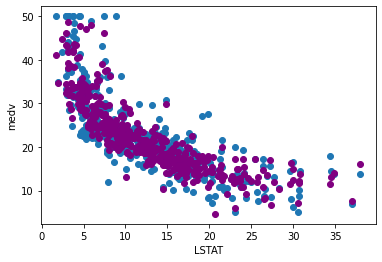

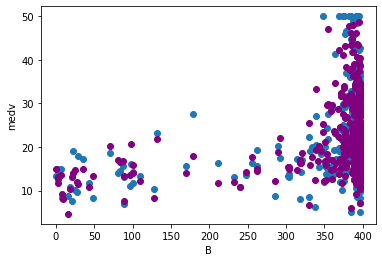

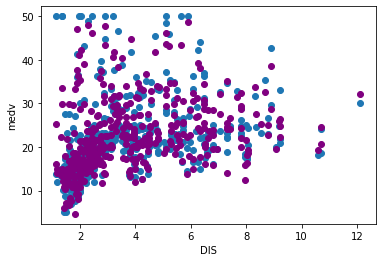

In [ ]:

df = train
df = df.round(3)
df.drop(['RAD'], axis=1, inplace=True)

medv = df['MEDV'].to_numpy()
x = df.loc[:, 'CRIM':'LSTAT'].copy().to_numpy()

x = np.hstack((np.power(x, 2), x))
x = np.hstack((x, np.ones((x.shape[0], 1))))

predicted_values = predict(x, weight(x, medv))
print(weight(x, medv))

plt.figure()
plt.scatter(df['LSTAT'], medv)
plt.scatter(df['LSTAT'], predicted_values, color='purple')
plt.xlabel('LSTAT')
plt.ylabel('medv')
plt.show()

plt.figure()
plt.scatter(df['B'], medv)
plt.scatter(df['B'], predicted_values, color='purple')
plt.xlabel('B')
plt.ylabel('medv')
plt.show()

plt.figure()
plt.scatter(df['DIS'], medv)
plt.scatter(df['DIS'], predicted_values, color='purple')
plt.xlabel('DIS')
plt.ylabel('medv')
plt.show()


In [ ]:
def gaussian_basis_function(x, mu, sigma=0.1):
    return np.exp(-0.5 * (x - mu) ** 2 / sigma ** 2)

    

In [ ]:

mse_train = np.linalg.norm(np.subtract(medv, predicted_values))
#mse_test = np.linalg.norm(np.subtract(y, predicted_test))

print('MSE train:{} '.format(mse_train))
#print('MSE test:{} '.format(mse_test))